# Homework 5: 2D Arrays, Agent-based Modeling, and Data Ethics (EXTRA CREDIT)

### <p style="text-align: right;"> &#9989; Put your name here.


# __CMSE  201 &ndash; Fall 2024__

<img src="https://cmse.msu.edu/_assets/images/about/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="200" 
     width="200" />
     
## Learning Goals

In this homework, you will:

* Access and manipulate 2D arrays
* Implement and explore an Agent-based model
* Play an algorithm building game

## Practice goals

* Using functions to optimize code development
* Debugging complex code

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Tuesday, December 10, 2024** 

It should be uploaded into D2L Homework #5.  Submission instructions can be found at the end of the notebook.

**Special note on Extra Credit:** You may complete part of the assignment rather than the whole assingment. If you choose to do so, **you must list at the top of the assignment which problems your instructor should grade.** You may not hand in this assignment with only the Academic integrity statement filled in and nothing else. Doing so will result in the assignment graded as a 0. The extra credit from this Homework Assignment will be applied to your Homework grade only (i.e. if you have 100% on all of your homeworks, your grade will not be increased by doing the extra credit). However, if your Homework average grade is anything less than a 100%, it may be worth it to submit this assignment to improve your grade. Because of the timing at the end of the semester, you may not get feedback on your work. However, if you would like feedback, pelase reach out to your section intructor.

The grade breakdown for this assignment is:
* Part 0 (2 points)
* Part 1 (15 points)
* Part 2 (27 points)
* Part 3 (20 points)

Total: 64 points

---

## Part 0. Academic integrity statement (2 points)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> *Put your personal academic integrity statement here.*

## Part 1 (15 points): The Algorithm

### &#9989;&nbsp; Part 1.1 (6 points)

Go to https://whatsthealgorithm.com/index.html and play the game (you can also play this game from your phone). When you have finished this game, come back to this notebook and answer the following questions:

1. What do you think the developers of this game wanted the players to learn from it?
2. If you were able to find your data on the internet that determines your algorithm, what are five keywords you think would show up?
3. What are your thoughts and feelings about companies having access to data showing your likes and dislikes of things to tailor products and ads specific to you. Should there be restrictions? Should you have access to manage this data?   

<font size=6 color="#009600">&#9998;</font> *Put your answer here.*

1.
2.
3.

### &#9989;&nbsp; Part 1.2 (9 points)

Now go to the resources tab on the website and select one resource to go through and learn more about. When you have finished, come back and answer these questions:

1. Which resource did you choose to learn about and how long did it take you to go through?
2. Summarize the resource and tell us what you learned from it (~3-5 sentences).
3. What are some broader implications of content being tailored to specific likes and dislikes?


<font size=6 color="#009600">&#9998;</font> *Put your answer here.*

1.
2.
3.

## Part 2: Agent-based Modeling: Conway's Game of Life (27 points)

In this part, we will be exploring the complexity that can be found within cellular automata with very simple rules. 

Start by reading [this (short) article](https://pi.math.cornell.edu/~lipa/mec/lesson6.html) to get some background on the rules of the "game". 

In [9]:
## Import packages
# standard includes
import numpy as np
import numpy.random as rand
%matplotlib inline
import matplotlib.pyplot as plt

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time  

### Functions for the model (`plotgrid`,`set_board`,`OnBoard`)

You don't need to do anything here except run this cell. These functions remain fundamentally the same as in the forest fire in-class example. 

In [16]:
#############RUN THIS CELL ###################
def plotgrid(myarray, board_size=50):
    
    # First create two vectors based on the x and y sizes of the grid
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0])
    
    # Use the numpy meshgrid function to create two matrices
    # of the same size as myarray with x and y indexes
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # Make a list of all the x and y indexes that are either trees or fire.
    life_x = x_indices[myarray == 1];   
    life_y = y_indices[myarray == 1]; 
    
    # Plot the trees and fire.
    plt.plot(life_x, myarray.shape[0] - life_y - 1, 'ks',markersize=(500/board_size))    
    
    # Set the x and y limits so we don't cut off the shapes
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 

    # Removing tick marks
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
def set_board(board_size=50,f_life_start=0.5):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_life_start: probability that a given cell is alive at the beginning

    Outputs a 2D numpy array with values set to either 0 or 1
        (dead or alive)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over board and roll the dice; if the random number is less
    # than f_life_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if rand.random() <= f_life_start:
                game_board[i,j] = 1

    # set the whole left edge of the board on fire. We're arsonists!
    # game_board[:,0] = 2
    
    return game_board

def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

### **Question 1 (12 points):** Functions for the model (`getNeighborValues`,`advance_board`)

### (1a) (4 points)

&#9989;&nbsp; The first step is to change the `getNeighborValues` function to now include the corner neighbors. This is known as the **Moore Neighborhood** and differs from the Von Neumann neighborhood used in the forest fire in-class assignment. 

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/MooreNeighborhood_Screenshot.png?raw=true" alt="Moore Neighborhood" width=400 />


In [11]:
def getNeighborValues(i,j, board):
    #modify this line of code
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1), (??), (??), (??), (??)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0], neighbor[1], board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighbor_values

SyntaxError: invalid syntax (1967567472.py, line 3)

### (1b) (6 points)
The Game of Life has two rules, 

* A living cell (1) without either two or three neighbors, dies (1 -> 0). 
* A dead cell (0) with exactly three neighbors, becomes alive (0 -> 1).  

&#9989;&nbsp; Add these rules to the `advance_board` function. 

In [13]:

def advance_board(game_board):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    
    # create a new array that's just like the original one, but initially 
    # set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
    
    # loop over each cell in the board and decide what to do.
    for i in range(game_board.shape[0]):
        for j in range(game_board.shape[1]):
            
            if game_board[i,j] == 0:
                
                if ?? :
                    
                    new_board[i,j] = 1
                    
                else:
                    
                    new_board[i,j] = 0
                    
            if game_board[i,j] == 1:
                
                if ?? :
                    
                    new_board[i,j] = 0
                    
                else:                   
                    new_board[i,j] = 1

    # return the new board
    return new_board


SyntaxError: invalid syntax (8938927.py, line 18)

### (1c) (2 points)

Run the model using the code below. 

&#9989;&nbsp; Watch and make note of the types of patterns that you observe in the simulation. Provide your observations in a markdown cell below. 

In [27]:
# 
f_life_start=0.5
board_size = 50

#
fig = plt.figure(figsize=(10,10))

# 
game_board =  set_board(board_size=board_size, f_life_start=f_life_start)

# 
plotgrid(game_board, board_size=board_size)

# 
on_fire = True
iter = 0
# 
while iter < 200:

    # 
    game_board = advance_board(game_board)
    
    # 
    plotgrid(game_board, board_size=board_size)
    time.sleep(0.05)  # 
    clear_output(wait=True)
    display(fig)
    fig.clear()

    iter += 1

# 
plt.close()

NameError: name 'plt' is not defined

<font size=6 color="#009600">&#9998;</font> *PUT YOUR OBSERVATIONS HERE.*


### **Question 2 (5 points):** Rewrite `set_board` so it  creates a defined pattern (`set_pattern`)

Below, is a copy of the `set_board` function. You need to edit the code (in the indicated place) so that the board creates repeated patterns of 5x5 blocks. Demonstrate that your code works by using `plotgrid` to plot your `set_pattern` result.

In [17]:
def set_pattern(board_size=50):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    
    # Here is a template array to "draw" your pattern on
    pattern_board = np.array([[ 0,  0,  0,  0,  0],
                              [ 0,  0,  0,  0,  0],
                              [ 0,  0,  0,  0,  0],
                              [ 0,  0,  0,  0,  0],
                              [ 0,  0,  0,  0,  0]])
    pattern_size = np.size(pattern_board, 0)
    
    # Here is where you need to add code
    for i in range(board_size):
        for j in range(board_size):
            
            ''' PUT YOUR CODE HERE '''

    return game_board


## Question 3 (2 points): Testing patterns

&#9989;&nbsp; Pick an interesting pattern that you observed before and try it out using the new `set_board` function. Explain if the behaviour that you expected is what you ended up observing. 


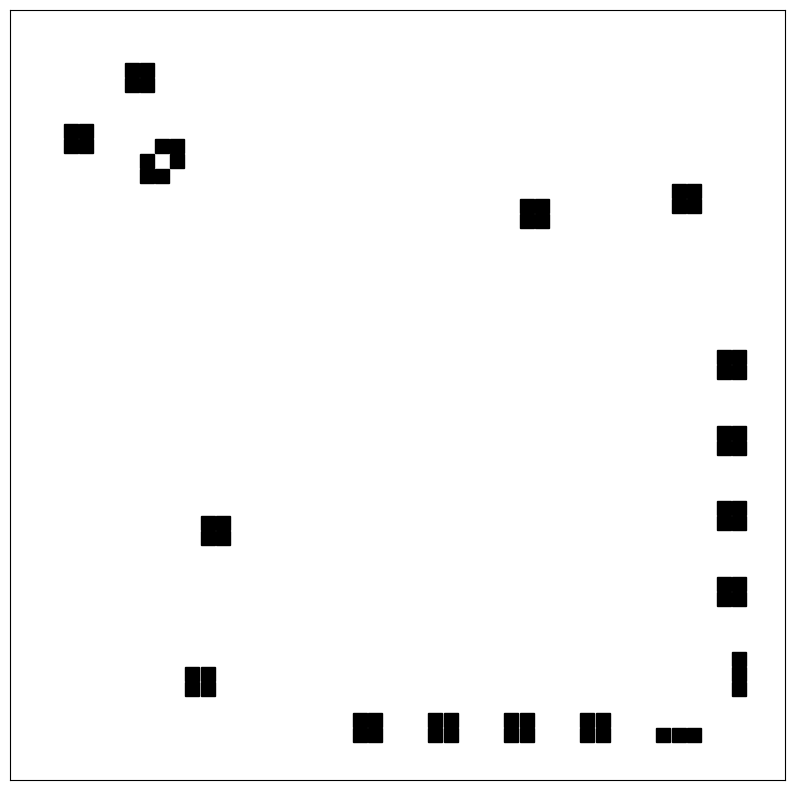

In [19]:
# Run Me!
board_size = 50

#
fig = plt.figure(figsize=(10,10))

# 
game_board =  set_pattern(board_size=board_size)

# 
plotgrid(game_board, board_size=board_size)

# 
on_fire = True
iter = 0
# 
while iter < 200:

    # 
    game_board = advance_board(game_board)
    
    # 
    plotgrid(game_board, board_size=board_size)
    time.sleep(0.05)  # 
    clear_output(wait=True)
    display(fig)
    fig.clear()

    iter += 1

# 
plt.close()

<font size=6 color="#009600">&#9998;</font> *PUT YOUR OBSERVATIONS HERE.*


### Question 4 (8 points): Change up the rules


&#9989;&nbsp; Using the cell below, copy your `advance_board` function and try changing the rules up a bit. Try to stick to rules based on the number of neighbors, but be creative. 


In [21]:
# Put function here!!!


&#9989;&nbsp; Use the cell below to copy your looping code for running the simulation and test out your new rules. In a markdown cell, explain how the behaviour has changed. What are your thoughts on the differences? 


In [22]:
# Put loop code here!!!


## Part 3: Compressing an Image using Singular Value Decomposition (20 points)

The singular value decomposition (SVD) of a matrix \( A \) (2D array) is the factorization of \( A \) into the product of three matrices:

$$
A = U \Sigma V^T
$$

where the columns of \( U \) and \( V \) are orthonormal, and the matrix $\Sigma$ is diagonal with positive real entries.

<img src="https://github.com/msu-cmse-courses/cmse201-supplemental/blob/main/Homework/SVD_k.jpg?raw=true" alt="SVD Image" width="50%">

SVD is useful in many tasks, such as image compression and image recognition. Using the singular values from this factorization allows us to represent the image with a smaller set of values (significant features), which preserves important characteristics of the original image while requiring less storage space in memory. This enables the image compression process.

In the following code, you will create a 2D array (matrix), use the `svd` function to generate the SVD of the matrix, and then reconstruct the matrix. The reconstructed matrix should be close or equal to the original matrix.

NOTE: In the cell below, there are packages we have not explicitly used yet (specifically skimage). They are likely already downloaded when you installed Anaconda, but if you do not have them, run the following cell to install the package. If that does not work, **please consult with your instructor ASAP.**

In [47]:
# RUN ME TO INSTALL skimage!
!pip install --user scikit-image

In [49]:
# Imports

from skimage.color import rgb2gray
from skimage import data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

"""
Singular Value Decomposition
"""

# Define a matrix
X = np.array([[3, 3, 2], [2, 6, -2],[4,5,6]])
print("Matrix X:\n", X)

# Perform SVD
U, S, V_T = svd(X)

# Print different components
print("U:\n", U)
print("Singular values (array):", S)
print("V^T:\n", V_T)

# Convert S to a diagonal matrix with appropriate dimensions
S_matrix = np.zeros((U.shape[0], V_T.shape[0]))  # Create a zero matrix
np.fill_diagonal(S_matrix, S)  # Fill the diagonal with singular values

# Reconstruct the original matrix
X_constructed = U @ S_matrix @ V_T
print("Reconstructed Matrix X:\n", X_constructed)

Matrix X:
 [[ 3  3  2]
 [ 2  6 -2]
 [ 4  5  6]]
U:
 [[-0.43577086  0.03239676 -0.8994744 ]
 [-0.42777357 -0.88672271  0.17530717]
 [-0.791905    0.46116514  0.4002664 ]]
Singular values (array): [10.60687252  5.45410481  0.86428938]
V^T:
 [[-0.50254962 -0.73852863 -0.44946562]
 [ 0.03087682 -0.53488526  0.84436034]
 [-0.86399682  0.41045489  0.2916098 ]]
Reconstructed Matrix X:
 [[ 3.  3.  2.]
 [ 2.  6. -2.]
 [ 4.  5.  6.]]


### (a) (2 points)

It is very likely that there is code that is new to you in the cell above. If there is code that is new to you, identify the lines it occurs and provide an internet source that explains what the code does.

If all of the code looks familiar to you, write an explanation below that explains the code to a CMSE 201 student for credit.

### (b) (10 points)

Now you can use what you've learned about singular value decomposition to compress the image. First, you need to read the "spartan" image and convert it into a 2D matrix (grayscale). In the following code, please use the `len` function to find the dimensions of the image.

TypeError: len() takes exactly one argument (0 given)

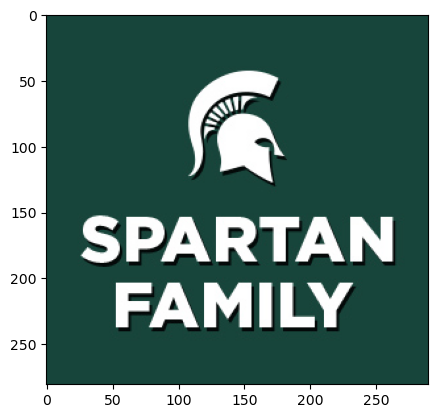

In [2]:
# Read Images
img = mpimg.imread('Spartan.jpg')
 
# Output Images
plt.imshow(img)

#modify this print line
print("The dimension of image:",len(),len())

gray_spartan = rgb2gray(img)


### (b) (5 points)
In the following, you can use `np.linalg.svd()` to decompose the image matrix (gray_spartan) into $ U$, $\Sigma $, and $V^T$. Here, `full_matrices=False` ensures that the decomposition is memory-efficient.

**Compressing the Image**: If you keep only the top ($k = 10$ and $k = 150$) values (along with their corresponding vectors in $U$ and $V^T $) to reduce the dimensionality. You will have the following comparision of compressed image and origimal image.

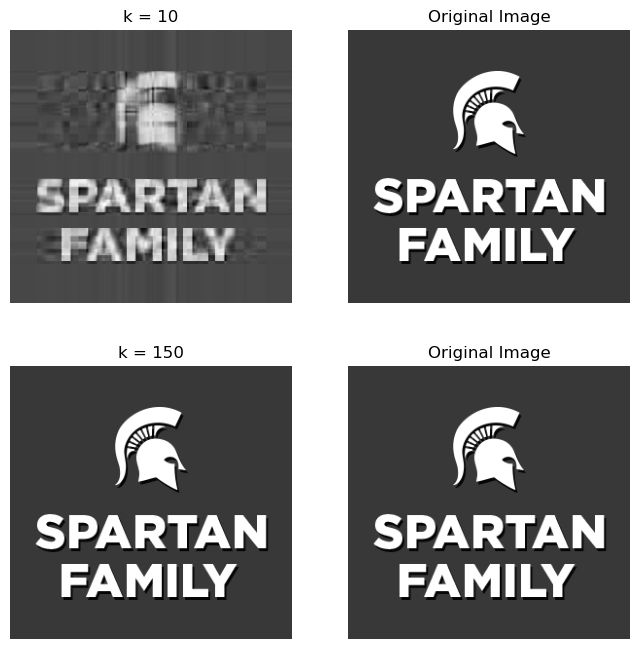

In [61]:
"""
SVD on image compression
"""
# calculate the SVD and plot the image
U, S, V_T = svd(gray_spartan, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

curr_fig = 0
for r in [10, 150]:
    spa_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(spa_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_spartan, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()


### &#9989;&nbsp; Copy and paste the above working code chunk from Part (a), and run the r-rank approximation with 6 different values (i.e. your `for` loop should be over 6 different values instead of only two). Then write down your observations of the comparison between your compressed images and the original image.

In [5]:
# your answer here

<font size=6 color="#009600">&#9998;</font> *PUT YOUR OBSERVATIONS HERE.*

### (c) (3 points)
Based on the results above, which compressed image (i.e. what value of $k$) do you think is acceptable compared to the original image?

In [7]:
# your answer here

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University